# Data Mining Project
### By:  Group 3: Elio Aybar, Cristal Garcia, Sunny Li, Matt Norgren

### Data Cleaning

In [58]:
#Packages to import
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000)

from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,VotingClassifier,BaggingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
from hypopt import GridSearch
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,Perceptron,SGDRegressor
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [3]:
### IMPORT SET

#Change working directory to match where the large files are stored
# it is not best practice to centrally store files this large - although
# git LFS should be explored

### CWD -  MAN
#%cd "C:\Users\Matth\OneDrive - The University of Chicago\2020_Autumn\Data Mining Platforms [MSCA 31008]\Group_Project\"
## CWD - Cristal
#%cd "C:\Users\cgarc\OneDrive - The University of Chicago\GitHub\US_HousingData-\docs"
#cd
## CWD - Elio 
#%cd "C:\Users\Tipo\Desktop\GitHub\Project"
## CWD - Sunny
%cd "/Users/sunny/Data mining/final project"


/Users/sunny/Data mining/final project


In [3]:
### Establish Pandas Data Frames / Import

### Zillow Set
## Cities Crosswalk  Dataset 
#cc_df = pd.read_csv('cities_crosswalk.csv', index_col='Unique_City_ID')
## City Time Series 
#cts_df = pd.read_csv('City_time_series.csv', index_col='RegionName')
## County Time Series 
cots_df = pd.read_csv('County_time_series.csv', index_col='RegionName')
## County Cross Walk 
#ccw_df = pd.read_csv('CountyCrossWalk_Zillow.csv', index_col='CBSAName')
## Metro Time Series 
#mts_df = pd.read_csv('metro_time_series.csv', index_col='RegionName')
## Neighborhood Time Series - Import 
#nbh_df = pd.read_csv('Neighborhood_time_series.csv', index_col='RegionName')
##State Time Series 
#sts_df = pd.read_csv('State_time_series.csv', index_col='RegionName')
## Zip 
zip_df = pd.read_csv('Zip_time_series.csv')  ### Issues with NaN on import
## Public School Ratings 
PS_df = pd.read_csv('Public_Schools.csv')
## Starbucks Upto 2017 for 70 Countries
SBUX_df = pd.read_csv('directory.csv')
## Food Desert 
foodlookup_df = pd.read_csv('food_access_variable_lookup.csv')
food_df = pd.read_csv('food_access_research_atlas.csv') 
## Hospital Quality Care 
hospital_df = pd.read_csv('Hospital General Information.csv', encoding="ISO-8859-1")
## Target Up to 2017 for US 
TGT_df = pd.read_csv('target.csv', encoding="ISO-8859-1")

In [ ]:
## Starbucks Upto 2017 for 70 Countries
SBUX_df = pd.read_csv('directory.csv')

## Target Up to 2017 for US 
TGT_df = pd.read_csv('target.csv', encoding="ISO-8859-1")

### Individual Set Cleaning (Preparing for Combination

In [ ]:
#######################################
## County Cross Walk -- Cleaning CG  ##
#######################################
#ccw_df.shape

#ccw_df.apply(lambda x: sum(x.isnull()))
#ccw_df.apply(lambda x: len(x.unique()))

In [4]:
################################
## Food Desert -- Cleaning CG  #
################################
food_df.shape

(72864, 147)

In [ ]:
#food_df.apply(lambda x: sum(x.isnull()))
#food_df.apply(lambda x: len(x.unique()))

In [5]:
#Columns to drop
food_df.drop(['GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_Vehicle',  'LATractsVehicle_20', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare'], axis = 1, inplace = True)
food_df.drop(['lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors1share', 'lawhite1', 'lawhite1share', 'lablack1', 'lablack1share', 'laasian1', 'laasian1share', 'lanhopi1', 'lanhopi1share', 'laaian1', 'laaian1share', 'laomultir1', 'laomultir1share', 'lahisp1', 'lahisp1share', 'lahunv1', 'lahunv1share'], axis = 1, inplace = True)
food_df.drop(['lasnap1', 'lasnap1share', 'lapop10', 'lapop10share', 'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10', 'laseniors10share', 'lawhite10', 'lawhite10share', 'lablack10', 'lablack10share', 'laasian10', 'laasian10share', 'lanhopi10', 'lanhopi10share', 'laaian10', 'laaian10share', 'laomultir10', 'laomultir10share', 'lahisp10', 'lahisp10share', 'lahunv10', 'lahunv10share', 'lasnap10', 'lasnap10share', 'lapop20', 'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20', 'lakids20share', 'laseniors20', 'laseniors20share'], axis = 1, inplace = True)
food_df.drop(['lawhite20', 'lawhite20share', 'lablack20', 'lablack20share', 'laasian20', 'laasian20share', 'lanhopi20', 'lanhopi20share', 'laaian20', 'laaian20share', 'laomultir20', 'laomultir20share', 'lahisp20', 'lahisp20share', 'lahunv20', 'lahunv20share'], axis = 1, inplace = True)
food_df.drop(['LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'HUNVFlag', 'lasnap20', 'lasnap20share', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'], axis = 1, inplace = True)

In [6]:
food_df.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'POP2010', 'OHU2010', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20'], dtype='object')

In [7]:
#Test PCA on Food desert variables to see which make up variability
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [8]:
#No need to standardize data since dummy variables
pca_food = food_df.drop(['CensusTract', 'State', 'County', 'Urban', 'POP2010', 'OHU2010', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome'], axis = 1)

In [13]:
pca_food = pca_food.as_matrix().astype("float32", copy = False)

In [11]:
def fit_pca(df, n_components):
    pca = PCA(n_components)  
    pca = pca.fit(df)  #fit the PCA model to the df (which will be the original, non-reduced df when used below)
    
    return pca

In [15]:
# we keep only 5 components
n_components = 5
pca = fit_pca(pca_food, n_components=n_components)

In [16]:
def plot_scaled_variance(pca):
    #same as above, create a subplot, decorate the plot, and show the percentage of variance
    fig, ax = plt.subplots(figsize=(10, 6)) 
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)   
    
    return ax

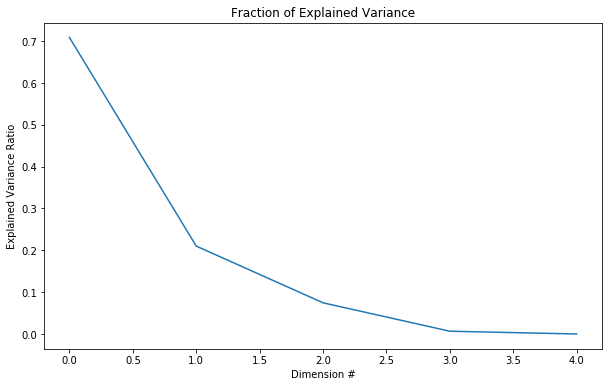

In [17]:
ax = plot_scaled_variance(pca)

In [22]:
def reduce(pca, array):
    reduced = pca.transform(array)  #reduce the model by transforming the PCA of the scaled dataset
    return reduced

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
reduced = reduce(pca, pca_food)

In [21]:
reduced.shape

(72864, 5)

In [ ]:
####################################################################
## Public School Ratings (2014-2015 School years) -- Cleaning CG  ##
####################################################################

PS_df.shape

In [ ]:
#Drop ZIP4 because 43% of data missing and already have other location indicators; don't need Telephone, website, source, 
#'VAL_METHOD', 'NAICS_CODE'; 'NAICS_DESC' is generalized description of 'LEVEL'; SHELTER_ID doesn't have 76% of data available 

PS_df.drop(['ZIP4', 'TELEPHONE', 'SHELTER_ID', 'WEBSITE', 'SOURCE', 'VAL_METHOD', 'NAICS_CODE', 'NAICS_DESC'], axis = 1, inplace = True)

#Drop Puerto Rico location
PS_df = PS_df[PS_df.COUNTRY != 'PRI']

#Drop Country column since all inland
PS_df.drop(['COUNTRY', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'VAL_DATE'], axis = 1, inplace = True)

from sklearn.preprocessing import LabelEncoder
#Instantiate LabelEncoder
le = LabelEncoder()

#Encode 'LEVEL_'
PS_df['LEVEL_'] = le.fit_transform(PS_df['LEVEL_'] )

#Encode 'ST_GRADE'
PS_df['ST_GRADE'] = le.fit_transform(PS_df['ST_GRADE'] )
                                           
#Encode 'END_GRADE'
PS_df['END_GRADE'] = le.fit_transform(PS_df['END_GRADE'])

#Convert SOURCEDATE to actual datatime type
PS_df['SOURCEDATE'] = pd.to_datetime(PS_df['SOURCEDATE'])

In [ ]:
PS_df.head()

In [ ]:
#############################################
## Cities Crosswalk  Dataset -- Cleaning EA #
#############################################
#cc_df.shape

In [ ]:
#cc_df.isnull().sum()

In [ ]:
##########################
## Target -- Cleaning EA #
##########################
TGT_df.shape

In [ ]:
TGT_df.info()

In [ ]:
#Select desired variables
TGT_df = TGT_df[['Address.FormattedAddress','Address.AddressLine1','Address.City','Address.CountryName','Address.Latitude','Address.Longitude','Address.County','Address.PostalCode','Address.Subdivision']]

In [ ]:
#Analize variable information
TGT_df.info()

In [ ]:
# Count the number of nan values in each column
print(TGT_df.isnull().sum())

In [ ]:
#Change variable names
TGT_df = TGT_df.rename(columns={"Address.FormattedAddress": "FormattedAddress", 
                   "Address.AddressLine1": "AddressLine1",
                   "Address.City": "City",
                   "Address.CountryName": "CountryName",
                   "Address.Latitude": "Latitude",
                   "Address.Longitude": "Longitude",
                   "Address.County": "County",
                   "Address.PostalCode": "PostalCode",
                   "Address.Subdivision": "Subdivision",
                  })

In [ ]:
#Drop missing values in column County variable
TGT_df = TGT_df[TGT_df.County.notnull()]

In [ ]:
TGT_df.head()

In [ ]:
#!pip install missingno
#import missingno as msno
#%matplotlib inline
#msno.matrix(TGT_df)

In [ ]:
# Count the number of nan values in each column
print(TGT_df.isnull().sum())

In [ ]:
#####################################
## Metro Time Series -- Cleaning EA #
#####################################
#mts_df.shape

In [ ]:
#############################
## Starbucks -- Cleaning EA #
#############################
SBUX_df.shape

In [ ]:
#############################
SBUX_df.info()

In [ ]:
A_1 = SBUX_df['Brand']
print(A_1.groupby(A_1).count())

In [ ]:
A_2 = SBUX_df['Country']
print(A_2.groupby(A_2).count())

In [ ]:
SBUX_df = SBUX_df[SBUX_df["Brand"] == 'Starbucks']

In [ ]:
SBUX_df = SBUX_df[SBUX_df["Country"] == 'US']

In [ ]:
#Select desired variables
SBUX_df = SBUX_df[['Brand','Street Address','City','State/Province','Country','Postcode','Longitude','Latitude']]

In [ ]:
SBUX_df.head()

In [ ]:
# Count the number of nan values in each column
print(SBUX_df.isnull().sum())

In [ ]:
#Drop missing values in column County variable
SBUX_df = SBUX_df[SBUX_df.Postcode .notnull()]

In [ ]:
# Count the number of nan values in each column
print(SBUX_df.isnull().sum())

In [ ]:
SBUX_df.info()

In [4]:
#######################
## Zip -- Cleaning MN #
#######################
zip_df.shape
#Understand range of outputs
zip_df.describe()

,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,4.383885e+06,1.051104e+06,1.051104e+06,8194.000000,86554.000000,384738.000000,197581.000000,33722.000000,814908.000000,72778.000000,...,3.073015e+06,1.296485e+06,3.631566e+06,3.612063e+06,3.684376e+06,1.337362e+06,1.339353e+06,1.253969e+06,723542.000000,1.334321e+06
mean,4.683726e+04,1.230490e+02,1.230721e+02,322.914946,188.769142,144.331279,154.549637,223.571617,158.755338,273.766816,...,1.485749e+05,1.877266e+05,1.977040e+05,2.079495e+05,2.932095e+05,1.429688e+03,1.414117e+03,9.484601e-01,1325.079733,1.463457e+03
std,2.883334e+04,1.172875e+02,1.180173e+02,301.027216,186.646266,115.581365,114.846920,216.186771,134.386742,290.412769,...,1.240348e+05,1.426228e+05,1.771804e+05,2.040974e+05,2.970779e+05,7.197163e+02,6.913265e+02,4.240444e-01,568.827402,8.077924e+02
min,7.450000e+02,3.000000e+00,2.000000e+00,24.793388,21.045918,20.833333,21.384804,19.370574,15.716151,28.750000,...,1.350000e+04,2.700000e+04,1.670000e+04,1.670000e+04,2.690000e+04,4.110000e+02,4.110000e+02,2.760000e-01,414.000000,4.110000e+02
25%,2.183000e+04,4.600000e+01,4.600000e+01,155.056896,97.826937,91.187739,99.996853,109.830759,92.095406,122.861795,...,7.560000e+04,1.045000e+05,1.014000e+05,1.022000e+05,1.499000e+05,1.006000e+03,1.000000e+03,6.980000e-01,933.000000,1.007000e+03
50%,4.466900e+04,8.800000e+01,8.800000e+01,230.835830,139.332358,117.742281,125.722509,147.375569,122.694639,184.293515,...,1.129000e+05,1.457000e+05,1.470000e+05,1.495000e+05,2.152000e+05,1.246000e+03,1.238000e+03,8.340000e-01,1194.000000,1.251000e+03
75%,7.271800e+04,1.600000e+02,1.600000e+02,380.292972,215.616002,160.705393,168.603216,241.664617,175.354721,312.237594,...,1.735000e+05,2.211000e+05,2.301000e+05,2.390000e+05,3.318000e+05,1.613000e+03,1.598000e+03,1.052000e+00,1549.000000,1.642000e+03
max,9.990100e+04,2.560000e+03,2.639000e+03,2128.129602,2746.913580,3167.641326,3364.485981,2310.628893,2799.423447,2802.346570,...,3.872400e+06,3.083700e+06,7.212500e+06,7.313400e+06,1.296680e+07,1.837500e+04,1.780800e+04,6.496000e+00,15891.000000,2.096400e+04


In [5]:
## Understand the number of nulls
zip_df.isnull().sum()

Date                                          0
RegionName                                    0
InventorySeasonallyAdjusted_AllHomes    3332781
InventoryRaw_AllHomes                   3332781
MedianListingPricePerSqft_1Bedroom      4375691
                                         ...   
ZRI_AllHomes                            3046523
ZRI_AllHomesPlusMultifamily             3044532
ZriPerSqft_AllHomes                     3129916
Zri_MultiFamilyResidenceRental          3660343
Zri_SingleFamilyResidenceRental         3049564
Length: 76, dtype: int64

In [6]:
## Establish two new columns in order to test logic of replacement / consolidation
zip_df['MedianListingPricePerSqft'] = 0
zip_df['NumberOfBedrooms'] = 0

In [7]:
## Replace null with 0
zip_df['MedianListingPricePerSqft_1Bedroom'] = zip_df['MedianListingPricePerSqft_1Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_2Bedroom'] = zip_df['MedianListingPricePerSqft_2Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_3Bedroom'] = zip_df['MedianListingPricePerSqft_3Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_4Bedroom'] = zip_df['MedianListingPricePerSqft_4Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_5BedroomOrMore'] = zip_df['MedianListingPricePerSqft_5BedroomOrMore'].fillna(0)
##
zip_df['MedianListingPrice_1Bedroom'] = zip_df['MedianListingPrice_1Bedroom'].fillna(0)
zip_df['MedianListingPrice_2Bedroom'] = zip_df['MedianListingPrice_2Bedroom'].fillna(0)
zip_df['MedianListingPrice_3Bedroom'] = zip_df['MedianListingPrice_3Bedroom'].fillna(0)
zip_df['MedianListingPrice_4Bedroom'] = zip_df['MedianListingPrice_4Bedroom'].fillna(0)
zip_df['MedianListingPrice_5BedroomOrMore'] = zip_df['MedianListingPrice_5BedroomOrMore'].fillna(0)
##
zip_df['MedianRentalPricePerSqft_1Bedroom'] = zip_df['MedianRentalPricePerSqft_1Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_2Bedroom'] = zip_df['MedianRentalPricePerSqft_2Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_3Bedroom'] = zip_df['MedianRentalPricePerSqft_3Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_4Bedroom'] = zip_df['MedianRentalPricePerSqft_4Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_5BedroomOrMore'] = zip_df['MedianRentalPricePerSqft_5BedroomOrMore'].fillna(0)
##
zip_df['MedianRentalPrice_1Bedroom'] = zip_df['MedianRentalPrice_1Bedroom'].fillna(0)
zip_df['MedianRentalPrice_2Bedroom'] = zip_df['MedianRentalPrice_2Bedroom'].fillna(0)
zip_df['MedianRentalPrice_3Bedroom'] = zip_df['MedianRentalPrice_3Bedroom'].fillna(0)
zip_df['MedianRentalPrice_4Bedroom'] = zip_df['MedianRentalPrice_4Bedroom'].fillna(0)
zip_df['MedianRentalPrice_5BedroomOrMore'] = zip_df['MedianRentalPrice_5BedroomOrMore'].fillna(0)

In [8]:
## Optimized set in order to iterate through and assign a value to the new column created
## Many prior attempts utilized a more if then style structure but inevitably took a considerably long time
## and replaced when the value was 0  thus overwriting the prior data at every run
##WC: https://guillim.github.io/pandas/2018/10/22/Pandas-if-else-on-columns.html 

condlist = [
    (zip_df['MedianListingPricePerSqft_1Bedroom'] != 0)
    #,(zip_df['MedianListingPrice_1Bedroom'] != 0)
    #,(zip_df['MedianRentalPricePerSqft_1Bedroom'] != 0)
    #,(zip_df['MedianRentalPrice_1Bedroom'] != 0)
    #,(zip_df['ZHVI_1bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_2Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_3Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_4Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_5BedroomOrMore'] != 0)
]
#Establish if the criteria is met - what is the result
choicelist = [1,2,3,4,5]
#Overwrite the number of bedroom columns with the given logic output 
zip_df['NumberOfBedrooms'] = np.select(condlist,choicelist)

In [9]:
## Count of distribution
T0 = zip_df['NumberOfBedrooms'].groupby(zip_df['NumberOfBedrooms']).count()
T0
#zip_df['MedianListingPricePerSqft_1Bedroom'].unique
#zip_df['NumberOfBedrooms'].isnull().sum()
#zip_df['NumberOfBedrooms'].unique()

NumberOfBedrooms
0    3951999
1       8194
2      80569
3     310476
4      30627
5       2020
Name: NumberOfBedrooms, dtype: int64

In [10]:
##Further Cleanup of like variables

## Optimized set in order to iterate through and assign a value to the new column created
## Many prior attempts utilized a more if then style structure but inevitably took a considerably long time
## and replaced when the value was 0  thus overwriting the prior data at every run
##WC: https://guillim.github.io/pandas/2018/10/22/Pandas-if-else-on-columns.html 

condlist2 = [
    (zip_df['MedianListingPrice_1Bedroom'] != 0)
    ,(zip_df['MedianRentalPrice_1Bedroom'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_1Bedroom'] != 0)
    ,(zip_df['MedianListingPrice_2Bedroom'] != 0)
    ,(zip_df['MedianRentalPrice_2Bedroom'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_2Bedroom'] != 0)
    ,(zip_df['MedianListingPrice_3Bedroom'] != 0)
    ,(zip_df['MedianRentalPrice_3Bedroom'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_3Bedroom'] != 0)
    ,(zip_df['MedianListingPrice_4Bedroom'] != 0)
    ,(zip_df['MedianRentalPrice_4Bedroom'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_4Bedroom'] != 0)
    ,(zip_df['MedianListingPrice_5BedroomOrMore'] != 0)
    ,(zip_df['MedianRentalPrice_5BedroomOrMore'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_5BedroomOrMore'] != 0)
]
#Establish if the criteria is met - what is the result
choicelist2 = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]
#Overwrite the number of bedroom columns with the given logic output 
zip_df['NumberOfBedrooms'] = np.select(condlist2,choicelist2)

In [11]:
## Count of distribution - Post Cleanup 2
T1 = zip_df['NumberOfBedrooms'].groupby(zip_df['NumberOfBedrooms']).count()
T1

NumberOfBedrooms
0    3977736
1      37370
2      74481
3     257926
4      33606
5       2766
Name: NumberOfBedrooms, dtype: int64

In [ ]:
## Net increase driven by cleaning additional columns
#T0 comp to T1 <> 0

In [13]:
## Drop Zillow based columns - estimate based
zip_df.drop([
'ZHVI_1bedroom'
,'ZHVI_2bedroom'
,'ZHVI_3bedroom'
,'ZHVI_4bedroom'
,'ZHVI_5BedroomOrMore'
,'ZHVI_AllHomes'
,'ZHVI_BottomTier'
,'ZHVI_CondoCoop'
,'ZHVI_MiddleTier'
,'ZHVI_SingleFamilyResidence'
,'ZHVI_TopTier'
,'ZRI_AllHomes'
,'ZRI_AllHomesPlusMultifamily'
,'ZriPerSqft_AllHomes'
,'Zri_MultiFamilyResidenceRental'
,'Zri_SingleFamilyResidenceRental'],axis=1)

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,PctOfHomesIncreasingInValues_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,MedianListingPricePerSqft,NumberOfBedrooms
0,1996-04-30,1001,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1996-04-30,1002,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,1996-04-30,1005,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1996-04-30,1007,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,1996-04-30,1008,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383880,2017-12-31,99709,57.0,34.0,0.0,0.0,0.000000,0.0,0.0,176.886792,...,NaN,12.349473,NaN,12.809327,6.779661,NaN,7.142857,11.33,0,0
4383881,2017-12-31,99712,43.0,30.0,0.0,0.0,0.000000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.94,0,0
4383882,2017-12-31,99801,80.0,74.0,0.0,0.0,228.168542,0.0,0.0,219.997535,...,NaN,10.323291,NaN,10.556306,7.964602,NaN,8.247423,14.07,0,3
4383883,2017-12-31,99835,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
##Combine the bedroom columns into the median listing price per sqft column to reduce column space

#zip_df['MedianListingPricePerSqft'] = pd.concat(['MedianListingPricePerSqft_1Bedroom'
#          , 'MedianListingPricePerSqft_2Bedroom'
#          , 'MedianListingPricePerSqft_3Bedroom'
#          , 'MedianListingPricePerSqft_4Bedroom'
#          , 'MedianListingPricePerSqft_5BedroomOrMore'],axis=0)
#mapping = {'MedianListingPricePerSqft_1Bedroom': 'MedianListingPricePerSqft'
#          , 'MedianListingPricePerSqft_2Bedroom':'MedianListingPricePerSqft'
#          , 'MedianListingPricePerSqft_3Bedroom':'MedianListingPricePerSqft'
#          , 'MedianListingPricePerSqft_4Bedroom':'MedianListingPricePerSqft'
#          , 'MedianListingPricePerSqft_5BedroomOrMore':'MedianListingPricePerSqft'}
#mapping = sum('MedianListingPricePerSqft_1Bedroom'
#          , 'MedianListingPricePerSqft_2Bedroom')
#          , 'MedianListingPricePerSqft_3Bedroom'
#           , 'MedianListingPricePerSqft_4Bedroom'
#           , 'MedianListingPricePerSqft_5BedroomOrMore')

#zip_df['MedianListingPricePerSqft'].combine('MedianListingPricePerSqft_1Bedroom'
#                                            ,'MedianListingPricePerSqft_2Bedroom'
#                                            ,'MedianListingPricePerSqft_3Bedroom')
#                                            ,'MedianListingPricePerSqft_4Bedroom'
#                                            ,'MedianListingPricePerSqft_5BedroomOrMore')


In [ ]:
## Drop duplicative columns post
#zip_df.drop([''],axis=1)


In [ ]:
## Count by year?



In [ ]:
## Count -> by non-Zillow Data - driven by value <> 0


#Isolate by zip repeating


In [ ]:
## 



In [ ]:
#######################################
## County Time Series -- Cleaning CG ##
#######################################
cots_df.shape

#cots_df.apply(lambda x: len(x.unique()))
#cots_df.apply(lambda x: sum(x.isnull()))

In [ ]:
#####################################
## City Time Series  -- Cleaning MN #
#####################################
#cts_df.shape
#Understand range of outputs
#cts_df.describe()

In [ ]:
#cts_df.isnull().sum()

In [ ]:
############################################
## Neighborhood Time Series -- Cleaning SL #
############################################
nbh_df.shape

In [ ]:
####################################
##State Time Series -- Cleaning SL #
####################################
sts_df.shape

In [5]:
#########################################
## Hospital Quality Care -- Cleaning SL #
#########################################
hospital_df.shape

(4812, 28)

In [6]:
hospital_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


In [17]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [26]:
null_df = hospital_df.isnull().sum(axis = 0).sort_values().to_frame('missing_value')
null_df[null_df['missing_value'] > 0].reset_index()

,index,missing_value
0,County Name,15
1,Meets criteria for meaningful use of EHRs,143
2,Safety of care national comparison footnote,2644
3,Efficient use of medical imaging national comp...,2779
4,Hospital overall rating footnote,3414
5,Patient experience national comparison footnote,3443
6,Mortality national comparison footnote,3460
7,Timeliness of care national comparison footnote,3546
8,Effectiveness of care national comparison foot...,3610
9,Readmission national comparison footnote,3795


In [53]:
# drop provider id, hospital name, address, phone number since they are all irrelevant 
# also drop all footnote since they are all incorporate in the other columns.
drop_these = ['Provider ID', 'Hospital Name', 'Phone Number']
drop_these.extend([col for col in hospital_df if 'footnote' in col])
hospital_df = hospital_df.drop(columns = drop_these)

# hospital_df.loc[:,hospital_df.columns.str.endswith('footnote')]

In [55]:
hospital_df.head()

,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average
2,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
3,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,Same as the national average,Not Available,Below the national average,Same as the national average,Below the national average,Above the national average,Not Available
4,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,Yes,Y,3,Same as the national average,Not Available,Same as the national average,Not Available,Same as the national average,Above the national average,Not Available


In [56]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Address                                               4812 non-null   object
 1   City                                                  4812 non-null   object
 2   State                                                 4812 non-null   object
 3   ZIP Code                                              4812 non-null   int64 
 4   County Name                                           4797 non-null   object
 5   Hospital Type                                         4812 non-null   object
 6   Hospital Ownership                                    4812 non-null   object
 7   Emergency Services                                    4812 non-null   object
 8   Meets criteria for meaningful use of EHRs             4669 non-null 

In [57]:
null_df = hospital_df.isnull().sum(axis = 0).sort_values().to_frame('missing_value')
null_df[null_df['missing_value'] > 0].reset_index()

,index,missing_value
0,County Name,15
1,Meets criteria for meaningful use of EHRs,143


In [61]:
hospital_df['Meets criteria for meaningful use of EHRs'].value_counts()

Y                4668
Not Available       1
Name: Meets criteria for meaningful use of EHRs, dtype: int64

In [62]:
hospital_df['Meets criteria for meaningful use of EHRs'] = hospital_df['Meets criteria for meaningful use of EHRs'].fillna('Not Available')

In [65]:
hospital_df['County Name'].value_counts()

LOS ANGELES     83
COOK            51
JEFFERSON       47
WASHINGTON      44
MONTGOMERY      43
                ..
MCCONE           1
TISHOMINGO       1
HAMPTON CITY     1
PIATT            1
CLOUD            1
Name: County Name, Length: 1563, dtype: int64

In [66]:
hospital_df.head()

,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average
2,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average,Same as the national average
3,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,Same as the national average,Not Available,Below the national average,Same as the national average,Below the national average,Above the national average,Not Available
4,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,Yes,Y,3,Same as the national average,Not Available,Same as the national average,Not Available,Same as the national average,Above the national average,Not Available


In [67]:
hospital_df['Hospital Ownership'].value_counts()

Voluntary non-profit - Private                 2052
Proprietary                                     800
Government - Hospital District or Authority     561
Voluntary non-profit - Other                    462
Government - Local                              407
Voluntary non-profit - Church                   343
Physician                                        68
Government - State                               65
Government - Federal                             45
Tribal                                            9
Name: Hospital Ownership, dtype: int64

In [68]:
hospital_df['Hospital Ownership'] = hospital_df['Hospital Ownership'].replace({
                    'Voluntary non-profit - Private': 'non-profit', 
                    'Proprietary':'for-profit', 
                    'Government - Hospital District or Authority': 'government',
                    'Voluntary non-profit - Other':'non-profit',
                    'Government - Local':'government',
                    'Voluntary non-profit - Church':'non-profit',
                    'Physician':'for-profit',
                    'Government - State':'government',
                    'Tribal ':'government',
                    'Government - Federal':'government',
                                  })

In [69]:
hospital_df['Hospital Type'].value_counts()

Acute Care Hospitals         3369
Critical Access Hospitals    1344
Childrens                      99
Name: Hospital Type, dtype: int64

There are four level in the following 7 aspect: 
Mortality national comparison; 
Safety of care national comparison;
Safety of care national comparison;
Readmission national comparison	Patient experience national comparison	Effectiveness of care national comparison	Timeliness of care national comparison	Efficient use of medical imaging national comparison
-1 Below the national average
0Same as the national average                    
1Above the national average       
Not Available   

In [70]:
# there are four level in the following 7 aspect
#Same as the national average    
#Not Available                   
#Above the national average       
#Below the national average
hospital_df['Mortality national comparison'].value_counts()

Same as the national average    2719
Not Available                   1352
Above the national average       400
Below the national average       341
Name: Mortality national comparison, dtype: int64

In [71]:
hospital_df['Safety of care national comparison'].value_counts()

Not Available                   2168
Same as the national average    1194
Above the national average       786
Below the national average       664
Name: Safety of care national comparison, dtype: int64

In [72]:

hospital_df['Readmission national comparison'].value_counts()

Same as the national average    2119
Not Available                   1017
Below the national average       866
Above the national average       810
Name: Readmission national comparison, dtype: int64

In [ ]:
hospital_df['Safety of care national comparison'].value_counts()

### Consolidation
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

In [ ]:
#### Consolidate dataframes for ease of use
pd.concat()


### Dimensional Reduction & Quick Analysis

### Feature Engineering
https://pypi.org/project/autoimpute/

### Model Training

In [ ]:
#(test as much algorithm as possible, possible models include Random Forest, Gradient Boosting, Ada-Boosting, Voting Classifier...)

### Hyperparameter Tuning

Use Randome search training for parameters found in following article: 
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#### Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

#### Minimum number of samples required at each leaf node
min_samples_leaf = [0.05, 0.10, 0.13, 0.15, 0.20, 0.26, 0.5]

#### Create the random grid
random_grid = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

#### Use the random grid to search for best hyperparameters
#### First create the base model to tune
dt = DecisionTreeRegressor()

#### Random search of parameters, using 10 fold cross validation, 
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, cv = 10, random_state=3, n_jobs = -1)
#dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=3, n_jobs = -1)

#### Fit the random search model
dt_random.fit(X_train, y_train)

#### See what best parameters from fitting the random search: 
dt_random.best_params_

### Model Accuracy Testing